# Лабораторная работа №1
# Решение обыкновенных дифференциальных уравнений

## 1. Методы решения ОДУ

Существует большое количество методов численного решения задачи. Для решения ОДУ в данной лабораторной работе будут использованы: явный и неявный метод Эйлера, усовершенствованный метод Эйлера, методы Гира различных порядков.

При построении численных алгоритмов будем считать, что решение этой дифференциальной задачи существует, оно единственно и обладает необходимыми свойствами гладкости.

Идея численных методов решения задачи состоит из четырех частей:
1. Вводится расчетная сетка по переменной t (время) из $N_{t}+1$ точки $t_{0}, t_{1}, ..., t_{N_{t}}$. Нужно найти значения неизвестной функции **u** в узлах сетки $t_{n}$. Обозначим через $y^{n}$ приближенное значение **u**($t_{n}$).

2. Предполагаем, что дифференциальное уравнение выполнено в узлах сетки.

3. Аппроксимируем производные конечными разностями.

4. Формулируем алгоритм, который вычисляет новые значения $y^{n+1}$ на основе предыдущих вычисленных значений $y^{k}$, $k < n$

Метод сходится в точке $t_{n}$, если $\left | y^{n} - u(t_{n}) \right | \rightarrow 0$ при $\tau \rightarrow 0$. Метод имеет $p$-ый порядок точности, если $\left | y^{n} - u(t_{n}) \right | = O(\tau^{p}), p > 0$ при $\tau \rightarrow 0$.

### Явный метод Эйлера

Проиллюстрируем указанные шаги. Для начала введем расчетную сетку. Очень часто сетка является равномерной, т.е. имеет одинаковое расстояние между узлами $t_{n}$ и $t_{n+1}$:
$$\omega_{\tau} = \left \{ t_{n} = n\tau, n = 0,1,...,N_{t} \right \}.$$

Затем, предполагаем, что уравнение выполнено в узлах сетки, т.е.: 
$$u'(t_{n} = F(t_{n}, u(t_{n}))$$

Заменяем производные конечными разностями. Запишем определение производной в произвольном узле сетки $t_{n}$: 
$$u'(t_{n}) = \lim_{\tau \rightarrow 0} \frac{u(t_{n}+\tau)-u(t_{n})}{\tau}$$

Вместо того, чтобы устремлять шаг сетки к нулю, мы можем использовать малый шаг $\tau$, который даст численное приближение $u'(t_{n})$: 
$$u'(t_{n}) \approx \frac{u^{n+1}-u^{n}}{\tau}$$

Такая аппроксимация известна как разностная производная вперед и имеет первый порядок по $\tau$, то есть $O(\tau)$. Теперь можно использовать аппроксимацию производной. Таким образом получим явный метод Эйлера: 
$$\frac{y^{n+1}-y^{n}}{\tau} = F(t_{n}, y^{n})$$

Выразим $y^{n+1}$: $$y^{n+1} = y^{n} + \tau F(t_{n}, y^{n})$$

При условии, что $y^{0} = u_{0}$, можно находить решения на последующих временных слоях.

### Неявный метод Эйлера

При построении неявного метода Эйлера значение функции ${F}$ берется на новом временном слое, т.е. 
$$\frac{y^{n+1}-y^{n}}{\tau} = F(t_{n+1}, y^{n+1})$$

Таким образом для нахождения приближенного значения искомой функции на новом временном слое $t_{n+1}$ нужно решить нелинейное уравнение относительно $y^{n+1}$: $$y^{n+1} - \tau F(t_{n+1}, y^{n+1}) - y^{n} = 0$$

Для решения уравнения можно использовать метод прогонки или метод Ньютона.

### Усовершенствованный метод Эйлера 2-го порядка

Основная идея этого метода: вычисляемое очередное значение $y^{n+1} = y^{n} + \tau F(t_{n}, y^{n})$ будет точнее, если значение производной, то есть угловой коэффициент прямой замещающей интегральную кривую на отрезке $[t_{n}, t_{n + 1}]$ будет вычисляться не по левому краю (то есь в точке $t_{n}$), а по центру отрезка $[t_{n}, t_{n + 1}]$. 

Но так как значение производной между точками $t_{n}$ и $t_{n + 1}$ не вычисляется, то перейдем к сдвоенным участкам $[t_{n - 1}, t_{n + 1}]$ центром в которых является точка $t_{n}$, при этом уравнение прямой получает вид: 
$$y = y^{n - 1} + f(t_{n}, y^{n})(t - t_{n - 1})$$
А формула $y^{n+1} = y^{n} + \tau F(t_{n}, y^{n})$: $$y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$$

Данная формула применима только для $n \geqslant 1$, следовательно, значени $y^{1}$ по ней получить нельзя, поэтому $y^{n}$ находят по методу Эйлера, при этом для получения более точного результата поступают так: сразу по формуле явного метода Эйлера находят значение: 
$$y^{\frac{1}{2}} = y^{0} + \frac{\tau}{2}F(t_{0}, y^{0})$$

В точке $t_{\frac{1}{2}} = t_{0} + \frac{\tau}{2}$, а затем находится $y^{1}$ по формуле $y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$ с шагом $\frac{\tau}{2}$: $$y^{1} = y^{0} + \tau F(t_{\frac{1}{2}}, y^{\frac{1}{2}})$$

После того как $y^{1}$ найдено дальнейшие вычисления при $n = 1,2,3,...N$ производится по формуле $$y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$$

Пример: $y^{2} = y^{0} + 2\tau F(t_{1}, y^{1})$


ТУТ БУДЕТ МЕТОД ГИРА

## 2. Реализация методов решения ОДУ

Необходимо решить дифференциальное уравнение

$$\left\{\begin{matrix}
\frac{\mathrm{d} y}{\mathrm{d} t} = 998y + 1998z\\ 
\frac{\mathrm{d} z}{\mathrm{d} t} = -999y - 1999z
\end{matrix}\right.$$
с начальными условиями $y(0)=1, z(0)=1$

Для решения ДУ были использованы такие методы, как явный и неявный методы Эйлера, усовершенственный метод Эйлера

#### Реализация данных методов:

In [469]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from typing import Callable

In [470]:
def du(t: list, u: list):
    return [998 * u[0] + 1998 * u[1], -999 * u[0] - 1999 * u[1]]
    

def explicity_euler(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    for i in range(amount_t):
        du_ = np.asarray(du(t[i], u[i]))
        u[i + 1] = u[i] + tau * du_
    return u, t


def implicity_euler(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    du_ = lambda t, u: np.asarray(du(t, u))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    
    def func(a, t, b):
        return a - tau * du_(t, a) - b
    
    for i in range(amount_t):
        u[i + 1] = optimize.fsolve(func, u[i], args=(t[i], u[i]))
    return u, t


def improved_euler(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    du_ = lambda t, u: np.asarray(du(t, u))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    
    t_ = t[0] + tau / 2
    u_ = u[0] + tau * du_(t[0], u[0]) / 2
    u[1] = u[0] + tau * du_(t_, u_)
    
    for i in range(1, amount_t - 1):
        u[i + 1] = u[i - 1] + 2 * tau * du_(t[i], u[i])
    return u, t


T_size = 0.1

#### Функции отрисовки:

In [471]:
def draw(t: list, u: list):
    fig = plt.figure()
    plt.title('ODE solution')
    plt.ylabel('y(t), z(t)')
    plt.xlabel('t')
    l1 = plt.plot(t, u)
    fig.legend((l1), ('yz'))
    plt.grid(True)
    plt.show()


def draw_explicity_euler():
    u, t = explicity_euler(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)
    
    
def draw_implicity_euler():
    u, t = implicity_euler(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)
    
    
def draw_improved_euler():
    u, t = improved_euler(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)

## 3. Итоговые результаты

### Явный метод Эйлера 
Шаг $\tau=0.001$:

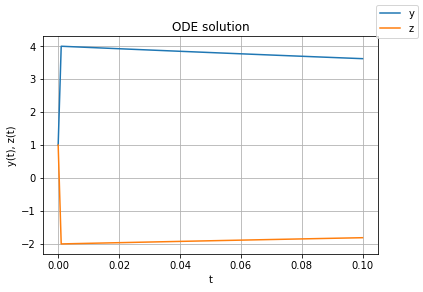

In [472]:
tau = 0.001
draw_explicity_euler()

Шаг $\tau=0.002$:

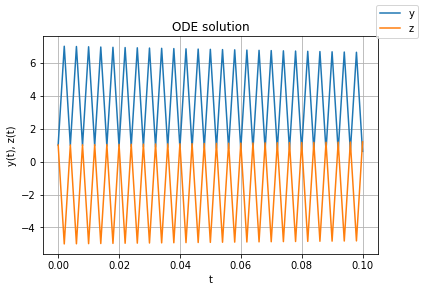

In [473]:
tau = 0.002
draw_explicity_euler()

Шаг $\tau=0.0025$:

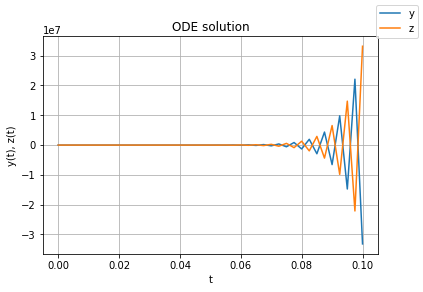

In [474]:
tau = 0.0025
draw_explicity_euler()

### Неявный метод Эйлера 
Шаг $\tau=0.001$:

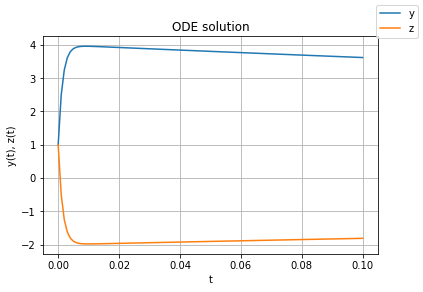

In [475]:
tau = 0.001
draw_implicity_euler()

Шаг $\tau=0.002$:

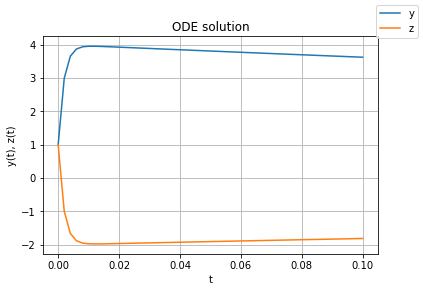

In [476]:
tau = 0.002
draw_implicity_euler()

Шаг $\tau=0.0025$:

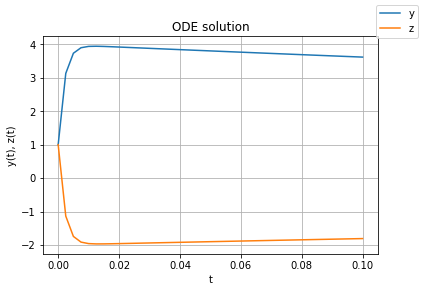

In [492]:
tau = 0.0025
draw_implicity_euler()

### Усовершенствованный метод Эйлера 
Шаг $\tau=0.001$:

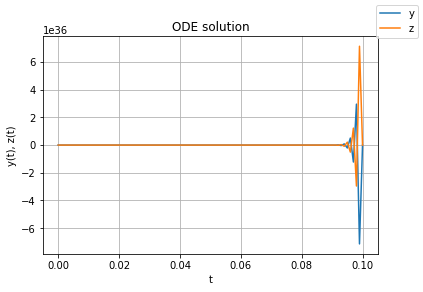

In [478]:
tau = 0.001
draw_improved_euler()

Шаг $\tau=0.002$:

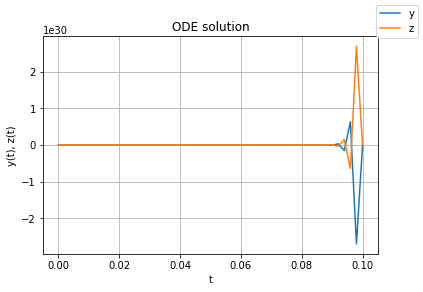

In [479]:
tau = 0.002
draw_improved_euler()

Шаг $\tau=0.0025$:

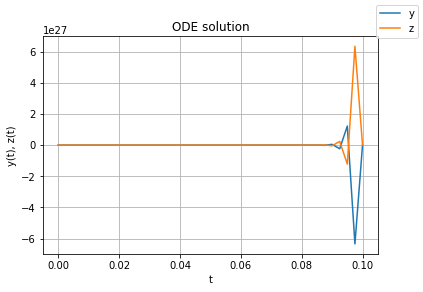

In [480]:
tau = 0.0025
draw_improved_euler()